# Perceptron

### OR problem

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
features = np.array([[0,0], [0,1], [1,0], [1,1]])
labels = np.array([[0], [1], [1], [1]])

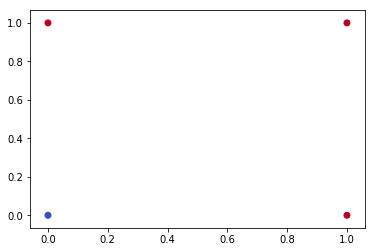

In [3]:
plt.scatter(features[:,0], features[:,1], c=labels, cmap = 'coolwarm')

In [4]:
n = 2

x = tf.placeholder(tf.float32, [1, 2])
y = tf.placeholder(tf.float32, [1, 1])

W = tf.Variable(tf.zeros([2, 1]))
bias = tf.Variable(tf.zeros([1, 1]))


In [5]:
y_model = tf.matmul(x, W) + bias
y_model = tf.sigmoid(y_model)

In [6]:
cost = tf.reduce_sum(tf.square(y-y_model))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [7]:
init = tf.global_variables_initializer()

In [8]:
with tf.Session() as sess:
    sess.run(init)
    for steps in range(20000):
        rand_ind = np.random.randint(len(labels), size=1)
        feed = {x:features[rand_ind], y:labels[rand_ind]}
        sess.run(train, feed_dict = feed)
        if steps % 1000 == 0:
            print('Epoch ', steps)
            print('cost ', sess.run(cost, feed_dict = feed))
        
    ma, mb = sess.run([W, bias])

Epoch  0
cost  0.245025
Epoch  1000
cost  0.0839486
Epoch  2000
cost  0.00490125
Epoch  3000
cost  6.68867e-08
Epoch  4000
cost  0.00396392
Epoch  5000
cost  8.74024e-10
Epoch  6000
cost  1.4785e-10
Epoch  7000
cost  3.13918e-11
Epoch  8000
cost  6.26699e-12
Epoch  9000
cost  7.85026e-05
Epoch  10000
cost  0.000154005
Epoch  11000
cost  2.34858e-05
Epoch  12000
cost  1.42109e-14
Epoch  13000
cost  3.47481e-05
Epoch  14000
cost  0.0
Epoch  15000
cost  1.25472e-05
Epoch  16000
cost  2.04978e-06
Epoch  17000
cost  0.0
Epoch  18000
cost  7.78292e-07
Epoch  19000
cost  0.0


In [11]:
print(ma, mb)

[[ 14.42818546]
 [ 14.43498516]] [[-6.88076782]]


In [12]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))
for a in features:
    v = np.array(ma).transpose()*np.array(a)
    print(a, sigmoid(v[0][0] + v[0][1] + mb[0][0]))

[0 0] 0.0010263005413719546
[0 1] 0.9994763783086157
[1 0] 0.9994728075902201
[1 1] 0.9999999997161011
